# Emotion Detection

*Importing Libraries*

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
import tensorflow as tf
print("Tensorflow Version: ",tf.__version__)


Tensorflow Version:  2.15.0


**Exploring Dataset**

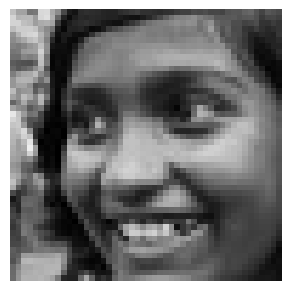

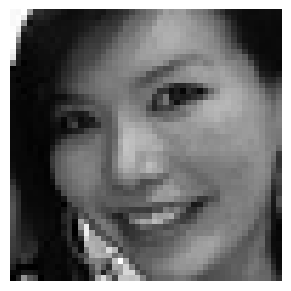

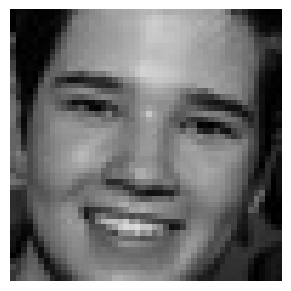

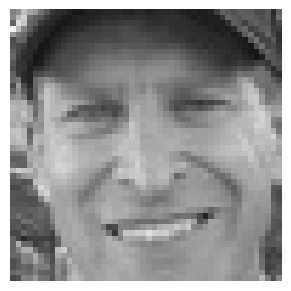

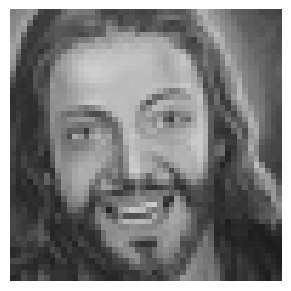

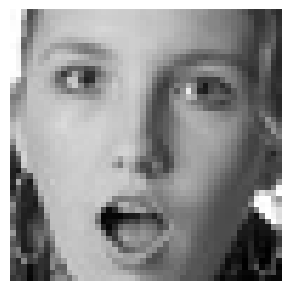

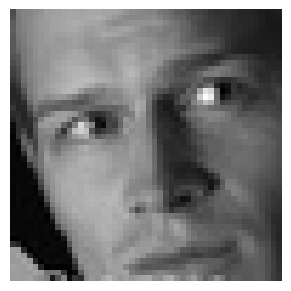

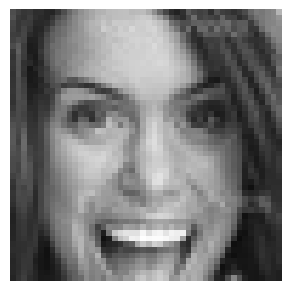

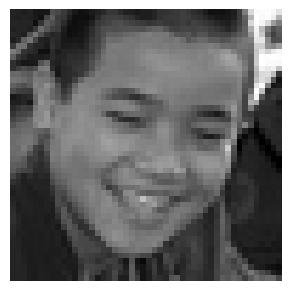

In [2]:
images=glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

**preparing data for training**

In [3]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()
train_generator=datagen_train.flow_from_directory("train/",
                                                  target_size=(img_size,img_size),
                                                  color_mode="grayscale",
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=True)

datagen_validation=ImageDataGenerator()
validation_generator=datagen_train.flow_from_directory("test/",
                                                   target_size=(img_size,img_size),
                                                   color_mode="grayscale",
                                                   batch_size=batch_size,
                                                   class_mode="categorical",
                                                   shuffle=True)
                                                  

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [4]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    return x
    

In [5]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    return x
   

In [13]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,32,(3,3))
    conv_2=Convolution(conv_1,64,(5,5))
    conv_3=Convolution(conv_2,128,(3,3))

    flatten=Flatten()(conv_3)

    dense_1=Dense_f(flatten,256)

    output=Dense(7,activation="softmax")(dense_1)
    model=Model(inputs=[inputs],outputs=[output])

    model.compile(loss=['categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])
    return model

    

In [14]:
model=model_fer((48,48,1))
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_4 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 32)        0   

**Initializing the model**

In [15]:
epochs=15
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint=ModelCheckpoint("model_weights.h5",monitor="val_accuracy",save_weights_only=True,mode='max',verbose=1)
callbacks=[checkpoint]

# Training the model

**The next cell takes time to complete**

In [17]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.6844 - accuracy: 0.3587
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 401s 892ms/step - loss: 1.6844 - accuracy: 0.3587 - val_loss: 1.7458 - val_accuracy: 0.3828
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3962 - accuracy: 0.4662
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 61s 137ms/step - loss: 1.3962 - accuracy: 0.4662 - val_loss: 1.3160 - val_accuracy: 0.4932
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.2772 - accuracy: 0.5144
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 62s 139ms/step - loss: 1.2772 - accuracy: 0.5144 - val_loss: 1.2454 - val_accuracy: 0.5244
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.2012 - accuracy: 0.5430
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 61

**Model Evaluation**

In [18]:
model.evaluate(validation_generator)

113/113 [==============================] - 7s 57ms/step - loss: 1.1266 - accuracy: 0.5971


[1.1265901327133179, 0.5971022844314575]

**Plotting Loss**

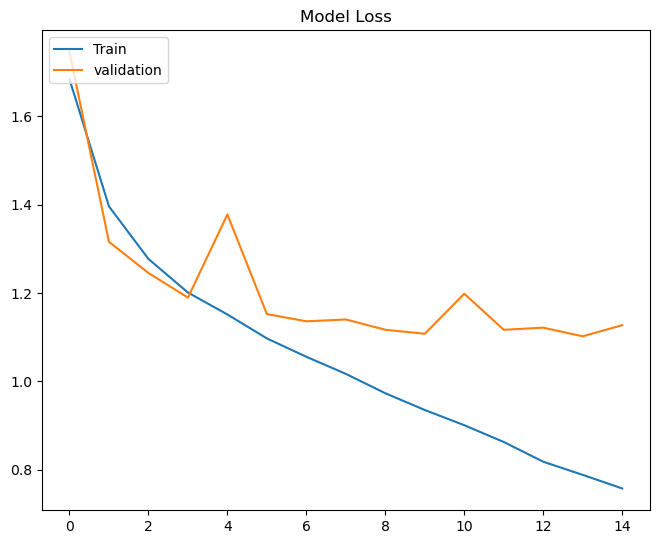

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

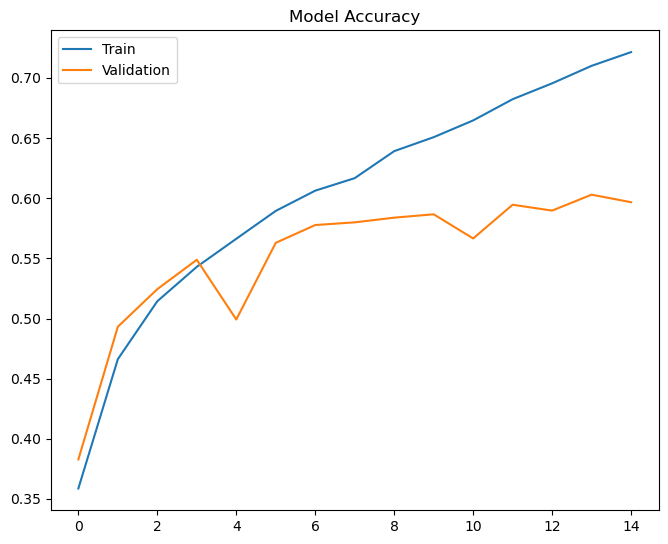

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

**Saving Model**

In [23]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)